In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
import numpy as np
import regression
from sklearn.preprocessing import StandardScaler

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [143]:
# Load data
X_train, X_val, y_train, y_val = regression.utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

# Scale the data, since values vary across feature. Note that we
# fit on the training data and use the same scaler for X_val.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)


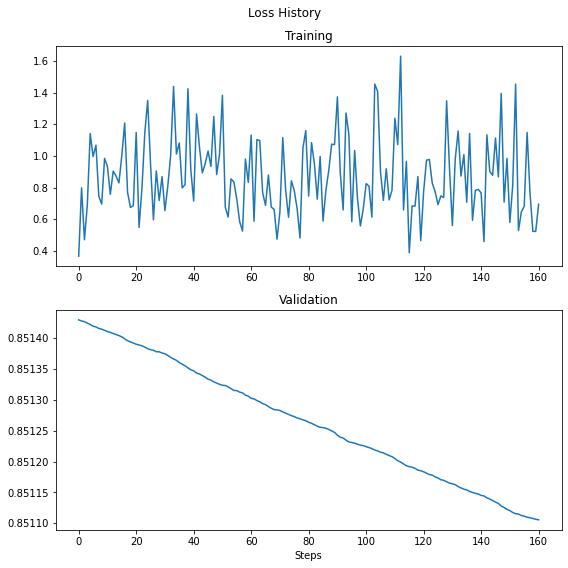

In [144]:
# For testing purposes, once you've added your code.
# CAUTION: hyperparameters have not been optimized.
log_model = regression.logreg.LogisticRegressor(num_feats=6, learning_rate=0.00001, tol=0.01, max_iter=10, batch_size=10)

log_model.train_model(X_train, y_train, X_val, y_val)
log_model.plot_loss_history()

In [145]:
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
y_preds = log_model.make_prediction(X_val)

In [136]:
mse = np.mean((y_preds-y_val)**2)
print(mse)

0.27469468647934736


In [140]:
np.min(y_preds)

0.008166504356244771

In [146]:
val_loss = log_model.loss_function(y_val, log_model.make_prediction(X_val))

In [147]:
val_loss

0.85110583640222